## Profiling interval
### dataset
### algo

In [1]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json

from result_plots.QuerySketch.common.common import read_data, get_metric_mapping
from result_plots.QuerySketch.common.process_data_from_solver import get_mean_from_iterations, normalize_error_result, get_ensemble_error
from result_plots.QuerySketch.common.plot import get_x_position, get_xtick_position, \
                                                plot_raw, get_gain, gain_over_strawman, consolidate_gain_over_strawman # , get_result_from_pkl

In [2]:
# modified, only get 1 epoch (specific_epoch_index)
def get_result_from_pkl(algos = ['cm'], rows = [1, 2, 3, 4, 5], widths = [4096, 8192, 16384, 32768, 65536, 131072], level=1, seeds=[1, 2, 3], 
                           count=1, measure_list = ['hh', 'entropy'], flowkeys = ["dstIP,dstPort",], epochs = ['30'],
                     datasets = ['equinix-nyc.dirA.20180517-130900.UTC.anon.pcap/', 'equinix-nyc.dirA.20180517-131000.UTC.anon.pcap/'],
                       specific_epoch_index=1):
    
    mapping = get_metric_mapping()
    
    # key: seed, metric, row, width
    total_ret = {}
    for seed in seeds:
        total_ret[seed] = {}
        for m in measure_list:
            total_ret[seed][m] = {}
            for r in rows:
                total_ret[seed][m][r] = {}
                for w in widths:
                    total_ret[seed][m][r][w] = []

    for seed in seeds:
        for r in rows:
            for w in widths:
                for flowkey in flowkeys:
                    for dataset in datasets:
                        tmp = read_data(algos, r, w, level, seed, count, flowkey, epochs, dataset)
                        for algo in algos:
                            for measure in measure_list:
                                # epoch
                                for e in range(len(epochs)):
                                    # raw data
                                    total_ret[seed][measure][r][w].append(tmp[algo][e][specific_epoch_index][mapping[algo][measure]])
                                    # print(w, flowkey, measure, epochs[e], np.mean(ll))
    # print(total_ret)
    # get mean/median from all seed results
    # key: metric, row, width
    final_ret = {}                                
    for m in measure_list:
        final_ret[m] = {}
        for r in rows:
            final_ret[m][r] = {}
            for w in widths:
                final_ret[m][r][w] = []
    
    for m in measure_list:
        for r in rows:
            for w in widths:
                arr = None
                for seed in seeds:
                    if arr is None:
                        arr = total_ret[seed][m][r][w]
                    else:
                        arr = np.vstack([arr, total_ret[seed][m][r][w]])
                final_ret[m][r][w] = np.mean(arr, axis=0).tolist()
                # print(f'm: {m} r: {r} w: {w}, {final_ret[m][r][w]}')
    # print(len(final_ret[m][r][w]))
    return final_ret

---

## Plotting functions

In [3]:
def call_plotting(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, name = "Test", \
                  mem_size = 131072, all_metrics = ['hh', 'change_det', 'entropy', 'card', 'fsd'], isSaveFig = False):
    plot_raw(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, name, all_metrics, isSaveFig)
    gain_result = gain_over_strawman(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, name, all_metrics, isSaveFig)
    merge_gain_result = consolidate_gain_over_strawman(gain_result, name, all_metrics, isSaveFig)
    
    global global_merge_gain_all_ensemble
    for d in merge_gain_result:
        global_merge_gain_all_ensemble.append(d)

    global global_name_all_ensemble
    global_name_all_ensemble.append(name)


## Common variables

In [4]:
seeds = [1, 2, 3, 4, 5]
count = 1

flowkeys = ["dstIP,dstPort",]
epochs = ['30']
# datasets = ['equinix-nyc.dirA.20180517-130900.UTC.anon.pcap/', 'equinix-nyc.dirA.20180517-131000.UTC.anon.pcap/', 'equinix-nyc.dirA.20180517-131100.UTC.anon.pcap/', 
#            'equinix-nyc.dirA.20180621-130900.UTC.anon.pcap/', 'equinix-nyc.dirA.20180621-131000.UTC.anon.pcap/', 'equinix-nyc.dirA.20180621-131100.UTC.anon.pcap/', 
#            'equinix-nyc.dirA.20180816-130900.UTC.anon.pcap/', 'equinix-nyc.dirA.20180816-131000.UTC.anon.pcap/', 'equinix-nyc.dirA.20180816-131100.UTC.anon.pcap/', ]

# datasets = ['equinix-nyc.dirA.20181018-130900.UTC.anon.pcap/', 'equinix-nyc.dirA.20181018-131000.UTC.anon.pcap/', 'equinix-nyc.dirA.20181018-131100.UTC.anon.pcap/', 
#            'equinix-nyc.dirA.20181115-130900.UTC.anon.pcap/', 'equinix-nyc.dirA.20181115-131000.UTC.anon.pcap/', 'equinix-nyc.dirA.20181115-131100.UTC.anon.pcap/', 
#            'equinix-nyc.dirA.20181220-130900.UTC.anon.pcap/', 'equinix-nyc.dirA.20181220-131000.UTC.anon.pcap/', 'equinix-nyc.dirA.20181220-131100.UTC.anon.pcap/', ]


all_metrics = ['hh', 'change_det', 'entropy', 'card', 'fsd']

isSaveFig = False
mem_size = 131072

In [5]:
## Global variables
## !!, must reset every time
global_merge_gain_all_ensemble = []
global_name_all_ensemble = []

## record ensemble error per box
global_ensemble_error = []

---

## Plot selection results

## 20180517

In [6]:
datasets = ['equinix-nyc.dirA.20180517-131100.UTC.anon.pcap/']

----

### 20180517_epoch_0_run_5

In [7]:
name = '20180517_epoch_0_run_5'

ret_sol1_ll = []
ret_sol2_ll = []
ret_sol3_ll = []
ret_sol4_ll = []
ret_us_ll = []

In [8]:

# ========== 20180517_epoch_0_run_5.json ==========

#############################
ret_us = {} 

measure_list = ['hh', 'change_det', ]
algos = ['cs']
widths = [4096]
rows = [3]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [2048]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [16384]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

ret_us_ll.append(ret_us)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [65536]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [32768]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [262144]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [16384]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [131072]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)


Num of run: 5
max_list: {'hh': 85.11228280238296, 'change_det': 16.022672725205915, 'entropy': 239.18939253378326, 'card': 12.801886299867817, 'fsd': 1.6628562088493877}


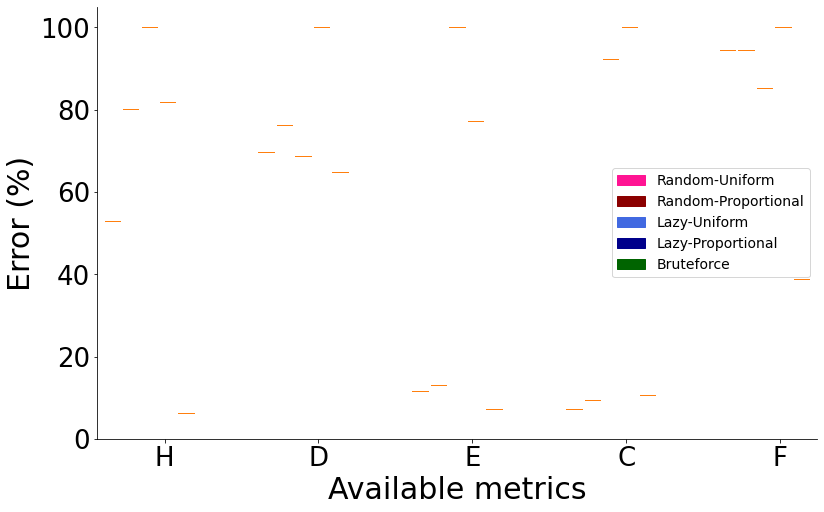

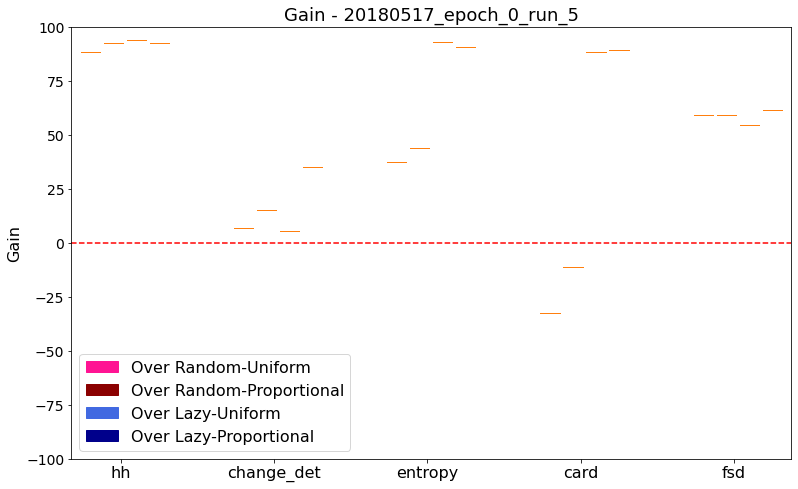

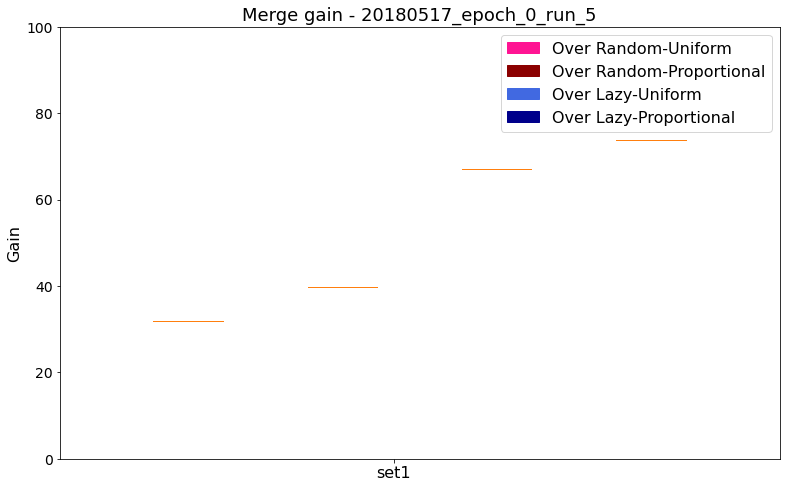

In [9]:
## pre-processing data
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = get_mean_from_iterations(ret_sol1_ll, ret_sol2_ll, ret_sol3_ll, ret_sol4_ll, ret_us_ll, all_metrics)
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = normalize_error_result(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics)
## Get & record ensemble error
global_ensemble_error = get_ensemble_error(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics, global_ensemble_error)
## call plotting
call_plotting(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, name, mem_size, all_metrics, isSaveFig)

----

### 20180517_epoch_1_run_5

In [10]:
name = '20180517_epoch_1_run_5'

ret_sol1_ll = []
ret_sol2_ll = []
ret_sol3_ll = []
ret_sol4_ll = []
ret_us_ll = []

In [11]:

# ========== 20180517_epoch_1_run_5.json ==========

#############################
ret_us = {} 

measure_list = ['hh', 'change_det', ]
algos = ['cm']
widths = [4096]
rows = [3]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [2048]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

ret_us_ll.append(ret_us)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [65536]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [32768]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [262144]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [16384]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [131072]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)


Num of run: 5
max_list: {'hh': 85.11228280238296, 'change_det': 16.022672725205915, 'entropy': 239.18939253378326, 'card': 12.801886299867817, 'fsd': 1.6628562088493877}


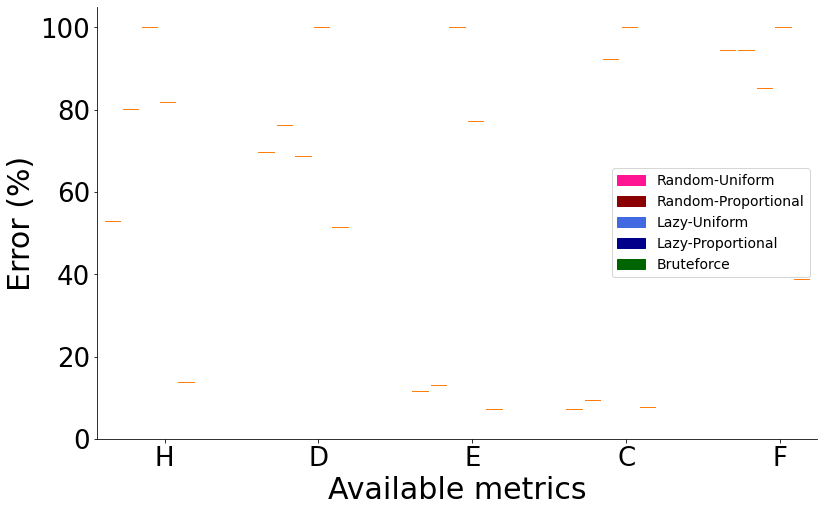

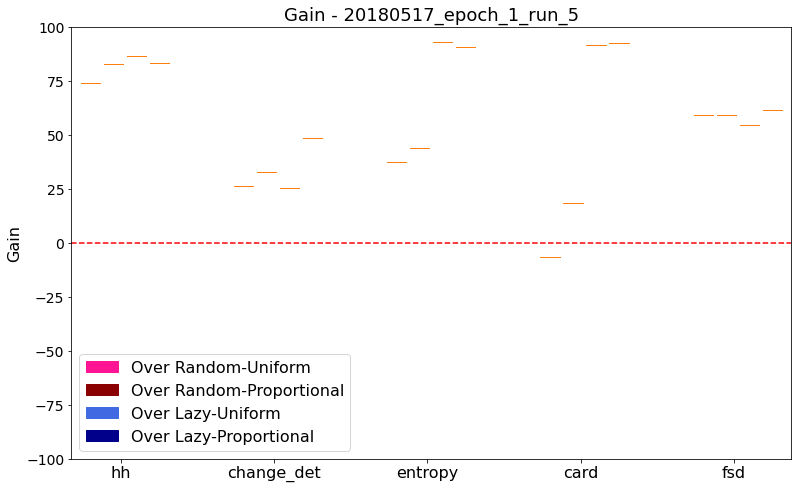

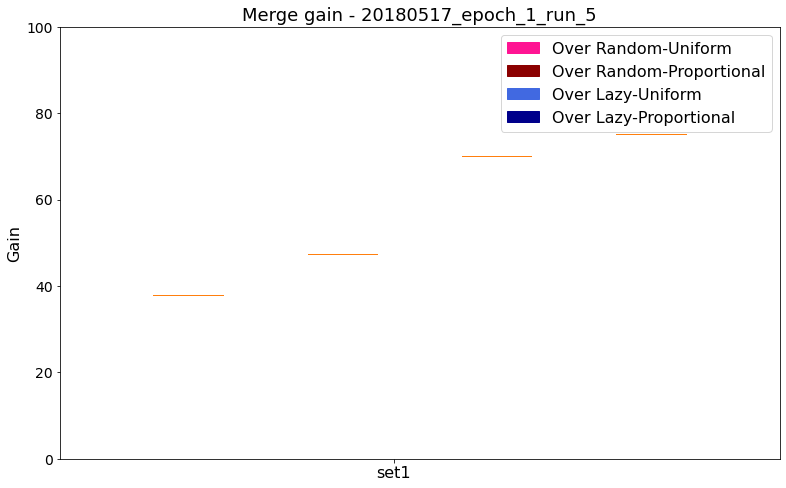

In [12]:
## pre-processing data
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = get_mean_from_iterations(ret_sol1_ll, ret_sol2_ll, ret_sol3_ll, ret_sol4_ll, ret_us_ll, all_metrics)
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = normalize_error_result(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics)
## Get & record ensemble error
global_ensemble_error = get_ensemble_error(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics, global_ensemble_error)
## call plotting
call_plotting(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, name, mem_size, all_metrics, isSaveFig)

----

### 20180517_epoch_2_run_5

In [13]:
name = '20180517_epoch_2_run_5'

ret_sol1_ll = []
ret_sol2_ll = []
ret_sol3_ll = []
ret_sol4_ll = []
ret_us_ll = []

In [14]:

# ========== 20180517_epoch_2_run_5.json ==========

#############################
ret_us = {} 

measure_list = ['hh', 'change_det', ]
algos = ['cs']
widths = [4096]
rows = [3]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [2048]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [16384]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

ret_us_ll.append(ret_us)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [65536]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [32768]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [262144]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [16384]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [131072]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)


Num of run: 5
max_list: {'hh': 90.2635659046344, 'change_det': 15.19043497957469, 'entropy': 257.3633520084142, 'card': 12.801886299867817, 'fsd': 1.7305159754824953}


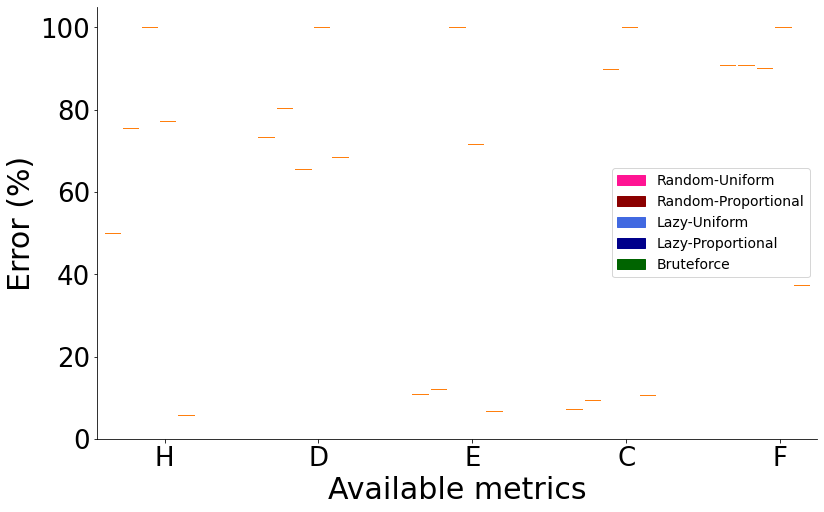

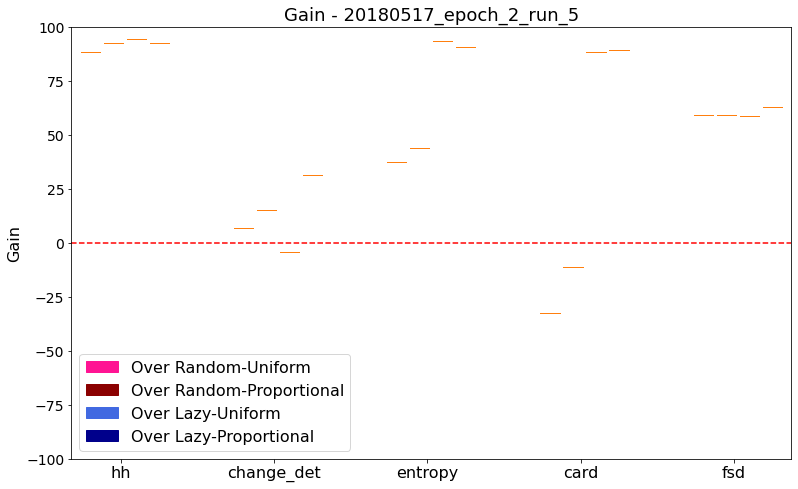

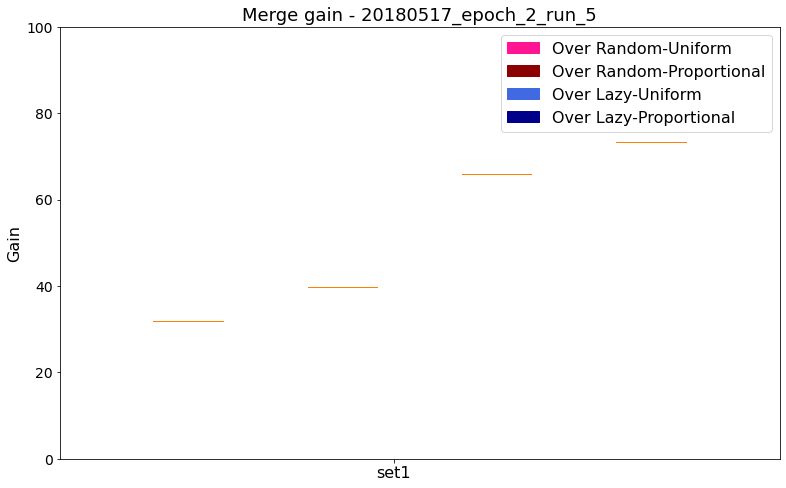

In [15]:
## pre-processing data
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = get_mean_from_iterations(ret_sol1_ll, ret_sol2_ll, ret_sol3_ll, ret_sol4_ll, ret_us_ll, all_metrics)
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = normalize_error_result(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics)
## Get & record ensemble error
global_ensemble_error = get_ensemble_error(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics, global_ensemble_error)
## call plotting
call_plotting(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, name, mem_size, all_metrics, isSaveFig)

----

### 20180517_epoch_3_run_5

In [16]:
name = '20180517_epoch_3_run_5'

ret_sol1_ll = []
ret_sol2_ll = []
ret_sol3_ll = []
ret_sol4_ll = []
ret_us_ll = []

In [17]:

# ========== 20180517_epoch_3_run_5.json ==========

#############################
ret_us = {} 

measure_list = ['hh', 'change_det', ]
algos = ['cm']
widths = [4096]
rows = [3]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [2048]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

ret_us_ll.append(ret_us)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [65536]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [32768]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [262144]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [16384]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [131072]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', 'change_det', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', 'change_det', ]
algos = ['cm']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', 'change_det', ]
algos = ['cm']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', 'change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', 'change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', 'change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)


Num of run: 5
max_list: {'hh': 79.96099970013157, 'change_det': 14.148877479835225, 'entropy': 221.0154330591523, 'card': 12.801886299867817, 'fsd': 1.660645407335237}


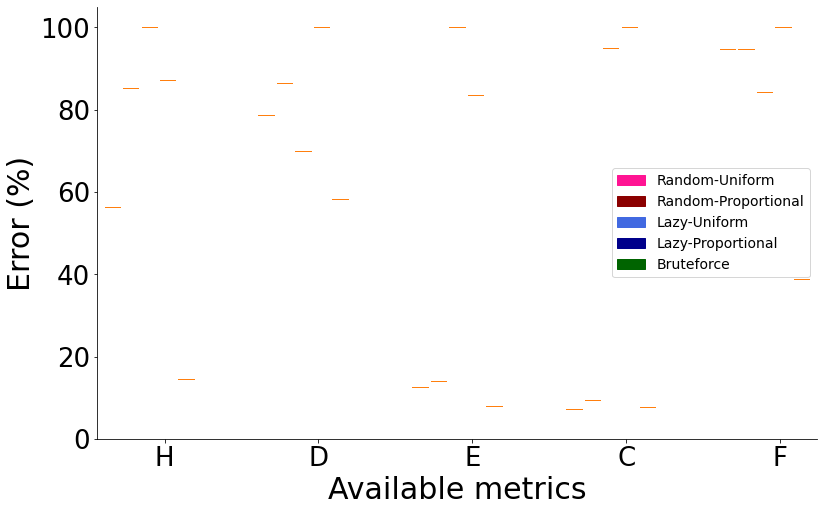

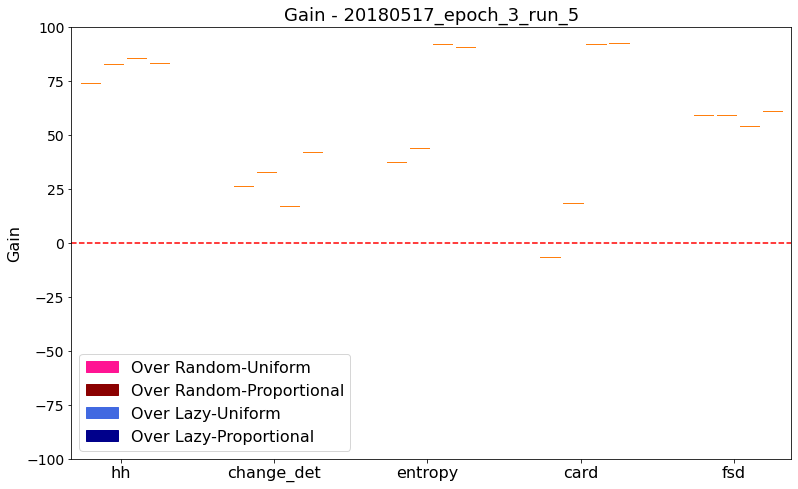

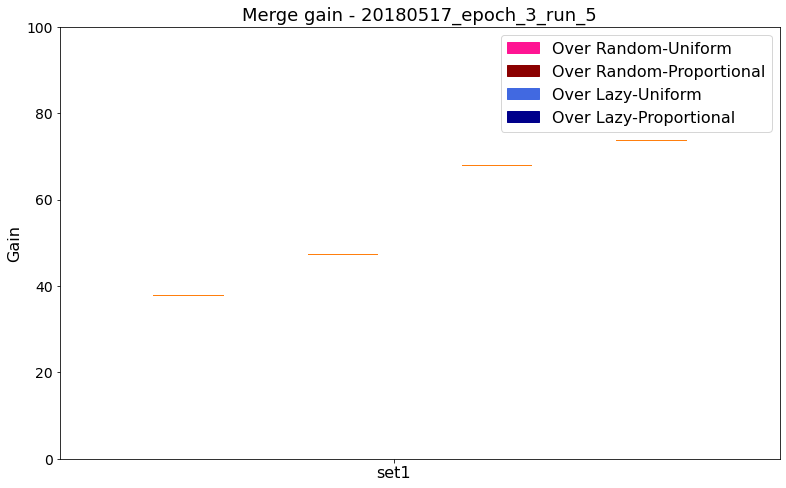

In [18]:
## pre-processing data
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = get_mean_from_iterations(ret_sol1_ll, ret_sol2_ll, ret_sol3_ll, ret_sol4_ll, ret_us_ll, all_metrics)
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = normalize_error_result(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics)
## Get & record ensemble error
global_ensemble_error = get_ensemble_error(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics, global_ensemble_error)
## call plotting
call_plotting(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, name, mem_size, all_metrics, isSaveFig)

----

### 20180517_epoch_4_run_5

In [19]:
name = '20180517_epoch_4_run_5'

ret_sol1_ll = []
ret_sol2_ll = []
ret_sol3_ll = []
ret_sol4_ll = []
ret_us_ll = []

In [20]:

# ========== 20180517_epoch_4_run_5.json ==========

#############################
ret_us = {} 

measure_list = ['hh', 'change_det', ]
algos = ['cs']
widths = [4096]
rows = [3]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [2048]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

ret_us_ll.append(ret_us)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [65536]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [32768]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [262144]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [16384]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [131072]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', 'change_det', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', 'change_det', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', 'change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', 'change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)


Num of run: 5
max_list: {'hh': 85.11228280238296, 'change_det': 15.417268675635773, 'entropy': 239.18939253378326, 'card': 12.801886299867817, 'fsd': 1.6628562088493877}


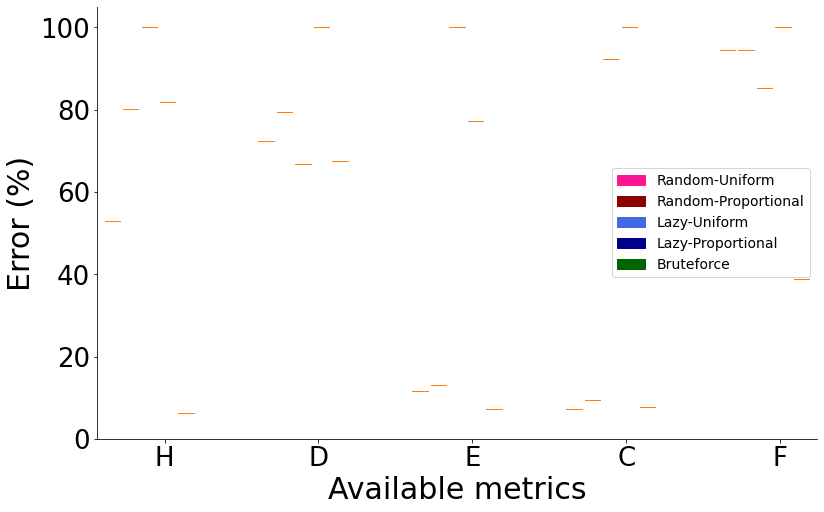

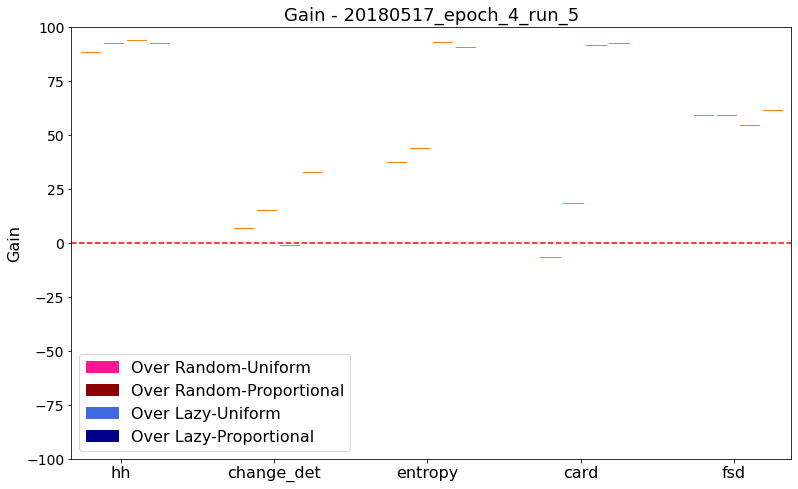

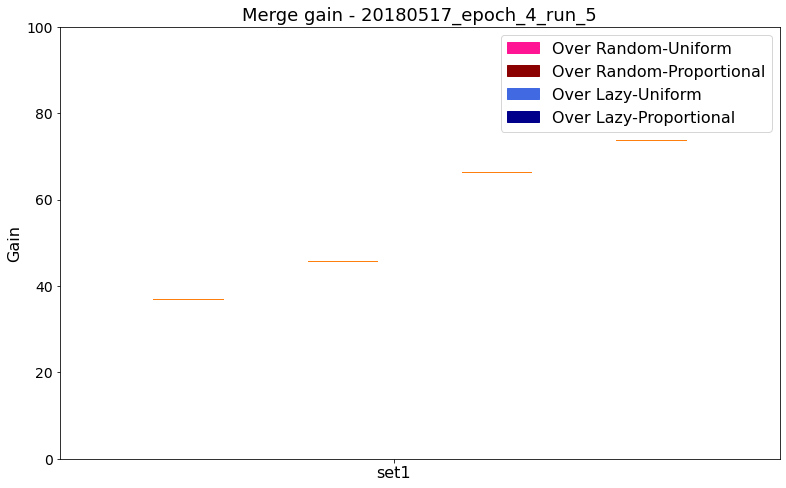

In [21]:
## pre-processing data
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = get_mean_from_iterations(ret_sol1_ll, ret_sol2_ll, ret_sol3_ll, ret_sol4_ll, ret_us_ll, all_metrics)
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = normalize_error_result(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics)
## Get & record ensemble error
global_ensemble_error = get_ensemble_error(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics, global_ensemble_error)
## call plotting
call_plotting(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, name, mem_size, all_metrics, isSaveFig)

----

### 20180517_epoch_5_run_5

In [22]:
name = '20180517_epoch_5_run_5'


ret_sol1_ll = []
ret_sol2_ll = []
ret_sol3_ll = []
ret_sol4_ll = []
ret_us_ll = []

In [23]:

# ========== 20180517_epoch_5_run_5.json ==========

#############################
ret_us = {} 

measure_list = ['hh', 'change_det', ]
algos = ['cm']
widths = [4096]
rows = [3]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [2048]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

ret_us_ll.append(ret_us)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [65536]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [32768]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [262144]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [16384]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [131072]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)


Num of run: 5
max_list: {'hh': 85.11228280238296, 'change_det': 14.016849381347921, 'entropy': 239.18939253378326, 'card': 12.801886299867817, 'fsd': 1.6711540818539103}


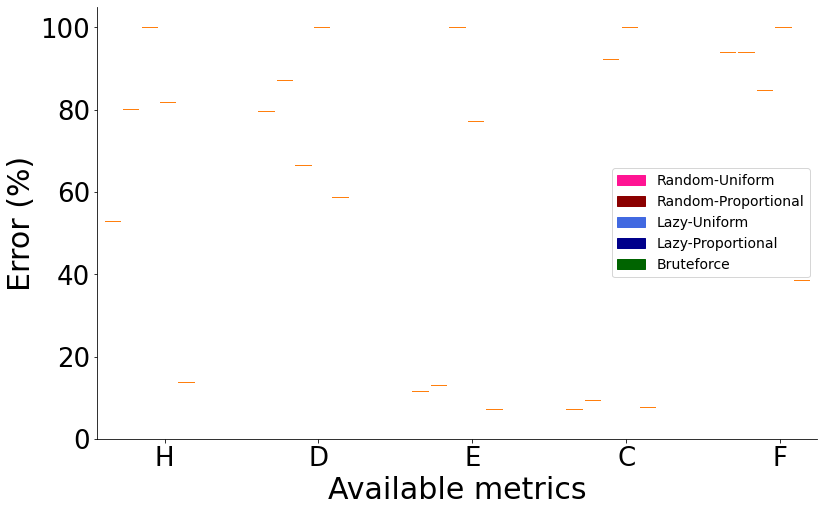

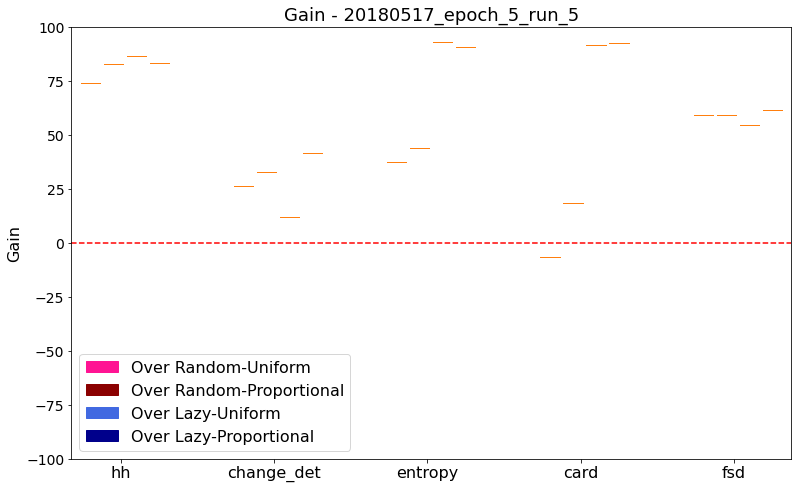

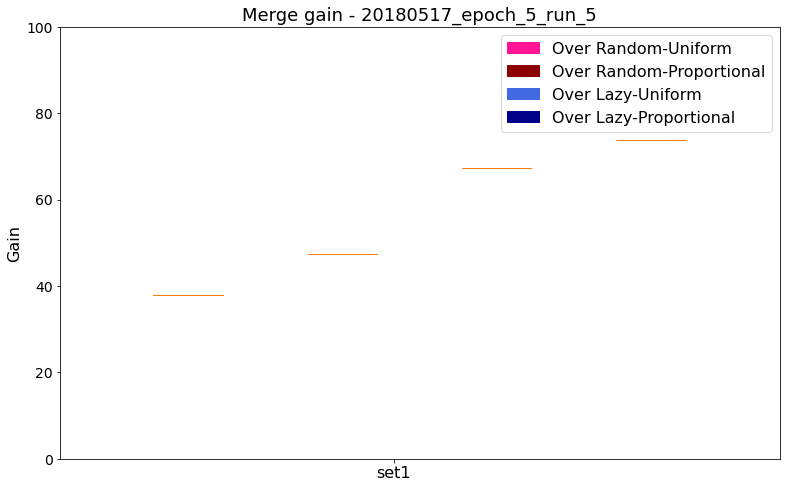

In [24]:
## pre-processing data
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = get_mean_from_iterations(ret_sol1_ll, ret_sol2_ll, ret_sol3_ll, ret_sol4_ll, ret_us_ll, all_metrics)
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = normalize_error_result(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics)
## Get & record ensemble error
global_ensemble_error = get_ensemble_error(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics, global_ensemble_error)
## call plotting
call_plotting(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, name, mem_size, all_metrics, isSaveFig)

## 20180621

In [25]:
datasets = ['equinix-nyc.dirA.20180621-131100.UTC.anon.pcap/']

----

### 20180621_epoch_0_run_5

In [26]:
name = '20180621_epoch_0_run_5'


ret_sol1_ll = []
ret_sol2_ll = []
ret_sol3_ll = []
ret_sol4_ll = []
ret_us_ll = []

In [27]:

# ========== 20180621_epoch_0_run_5.json ==========

#############################
ret_us = {} 

measure_list = ['hh', 'change_det', ]
algos = ['cs']
widths = [4096]
rows = [3]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [2048]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

ret_us_ll.append(ret_us)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [65536]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [32768]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [262144]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [16384]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [131072]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)


Num of run: 5
max_list: {'hh': 211.63103801948677, 'change_det': 16.67485958375223, 'entropy': 250.75029011717834, 'card': 9.700889746958126, 'fsd': 1.6732997778459886}


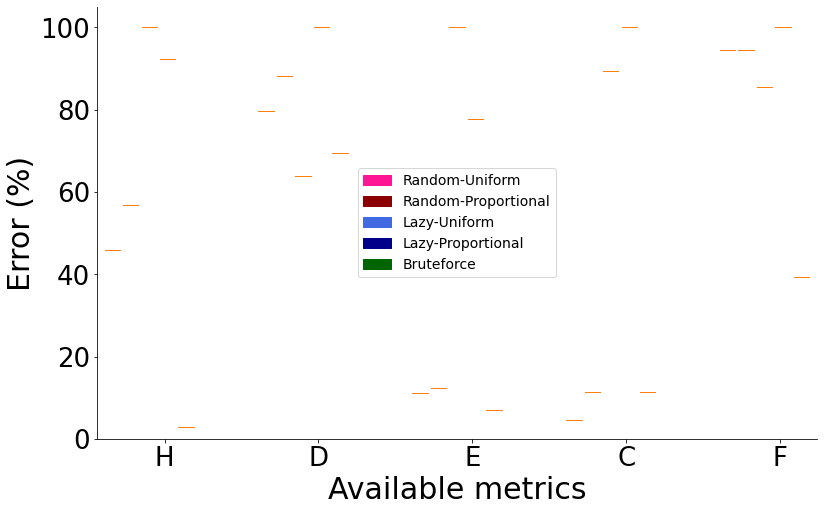

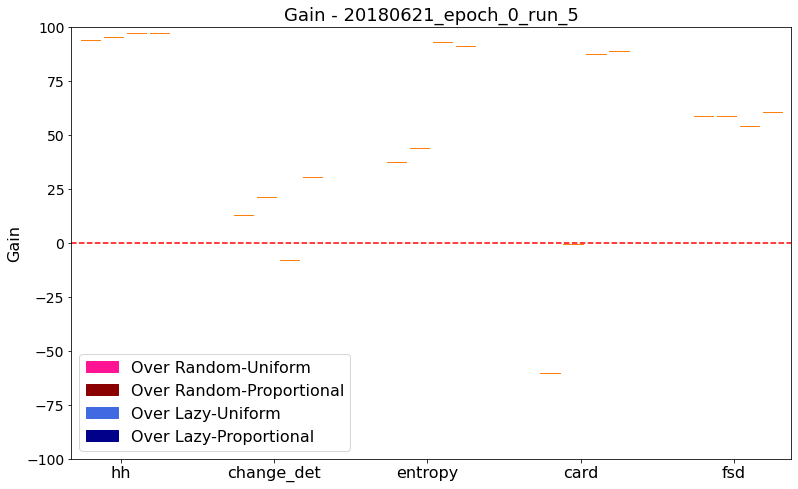

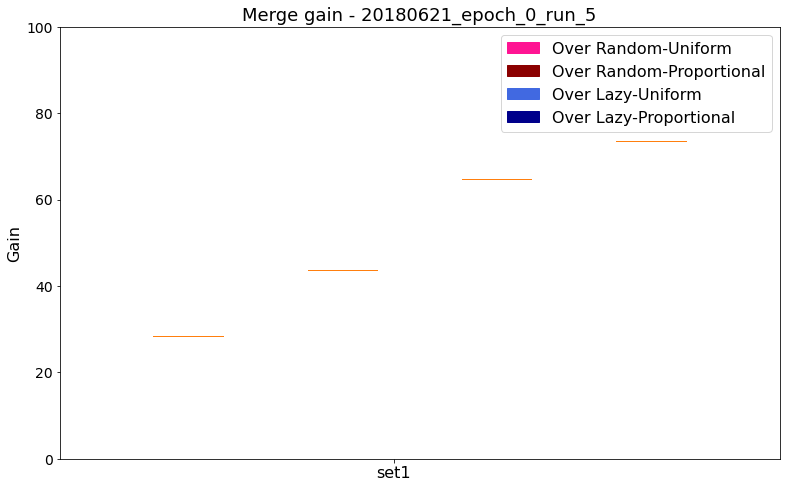

In [28]:
## pre-processing data
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = get_mean_from_iterations(ret_sol1_ll, ret_sol2_ll, ret_sol3_ll, ret_sol4_ll, ret_us_ll, all_metrics)
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = normalize_error_result(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics)
## Get & record ensemble error
global_ensemble_error = get_ensemble_error(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics, global_ensemble_error)
## call plotting
call_plotting(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, name, mem_size, all_metrics, isSaveFig)

----

### 20180621_epoch_1_run_5

In [29]:
name = '20180621_epoch_1_run_5'


ret_sol1_ll = []
ret_sol2_ll = []
ret_sol3_ll = []
ret_sol4_ll = []
ret_us_ll = []

In [30]:

# ========== 20180621_epoch_1_run_5.json ==========

#############################
ret_us = {} 

measure_list = ['hh', 'change_det', ]
algos = ['cm']
widths = [4096]
rows = [3]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [2048]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [16384]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

ret_us_ll.append(ret_us)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [65536]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [32768]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [262144]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [16384]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [131072]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)


Num of run: 5
max_list: {'hh': 222.52494468414938, 'change_det': 21.601944952143082, 'entropy': 287.98070624481835, 'card': 9.700889746958126, 'fsd': 1.6930303456751836}


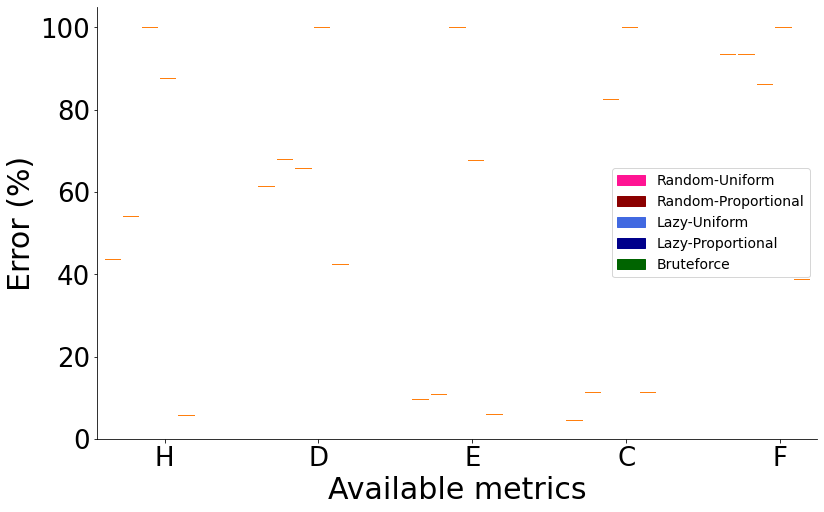

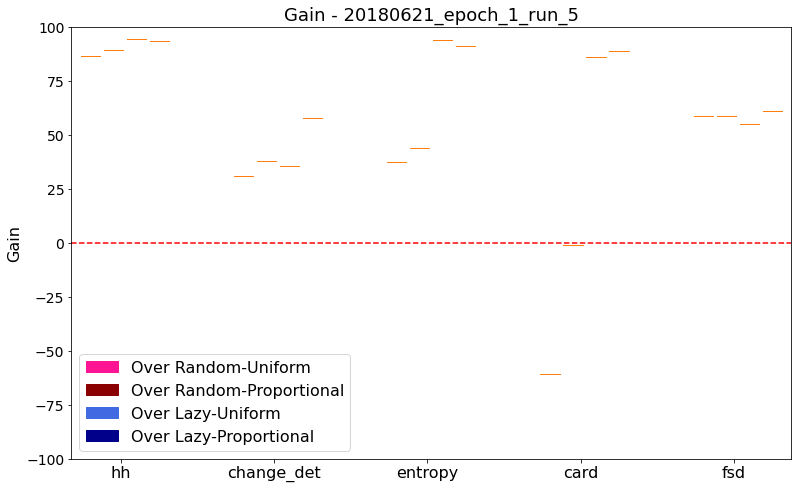

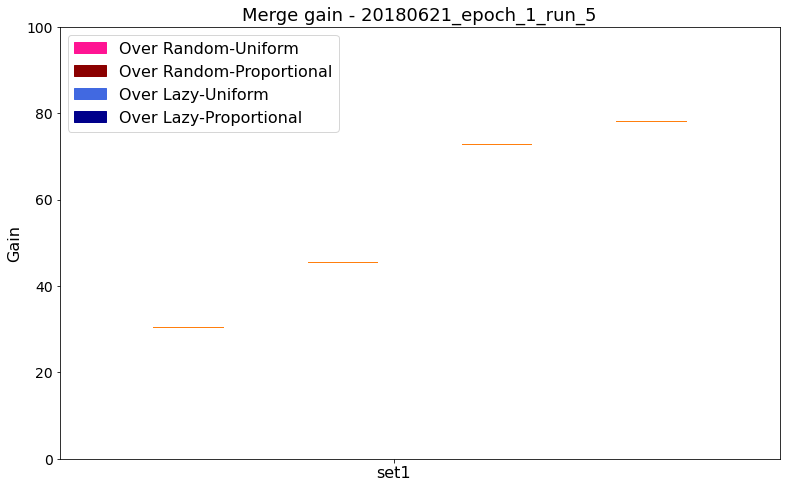

In [31]:
## pre-processing data
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = get_mean_from_iterations(ret_sol1_ll, ret_sol2_ll, ret_sol3_ll, ret_sol4_ll, ret_us_ll, all_metrics)
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = normalize_error_result(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics)
## Get & record ensemble error
global_ensemble_error = get_ensemble_error(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics, global_ensemble_error)
## call plotting
call_plotting(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, name, mem_size, all_metrics, isSaveFig)

----

### 20180621_epoch_2_run_5

In [32]:
name = '20180621_epoch_2_run_5'


ret_sol1_ll = []
ret_sol2_ll = []
ret_sol3_ll = []
ret_sol4_ll = []
ret_us_ll = []

In [33]:

# ========== 20180621_epoch_2_run_5.json ==========

#############################
ret_us = {} 

measure_list = ['hh', 'change_det', ]
algos = ['cs']
widths = [4096]
rows = [3]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [2048]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [16384]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

ret_us_ll.append(ret_us)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [65536]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [32768]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [262144]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [16384]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [131072]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)


Num of run: 5
max_list: {'hh': 222.52494468414938, 'change_det': 20.668113401140634, 'entropy': 287.98070624481835, 'card': 9.700889746958126, 'fsd': 1.7594520891568384}


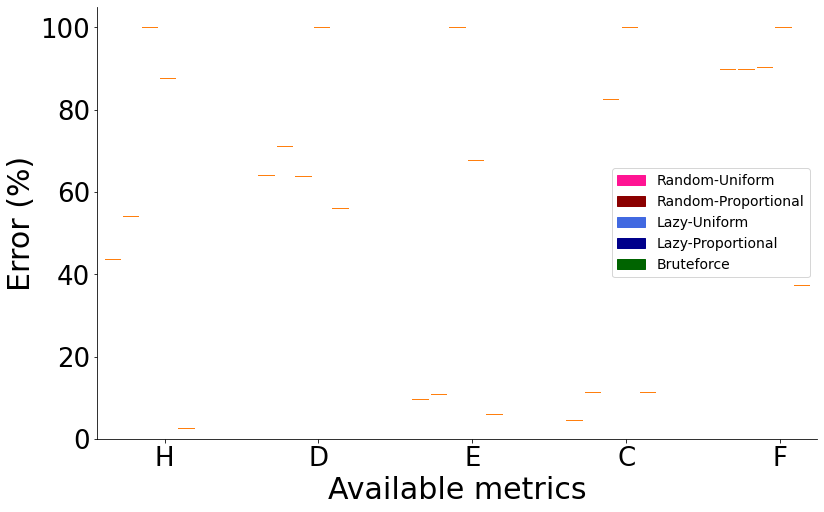

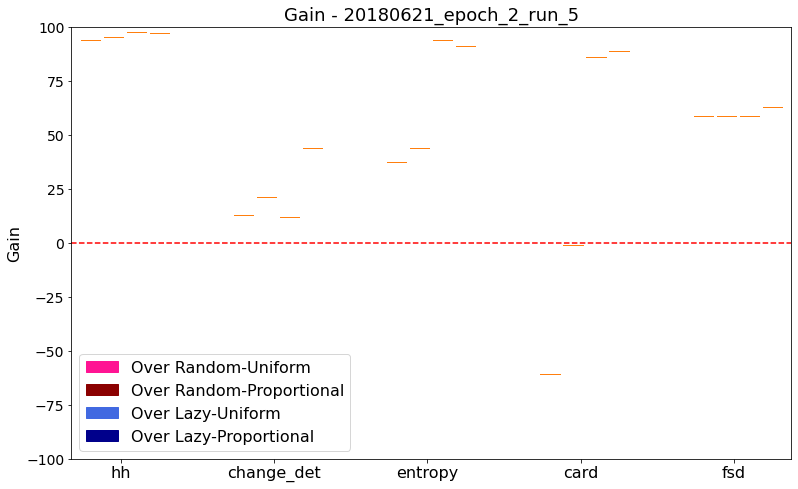

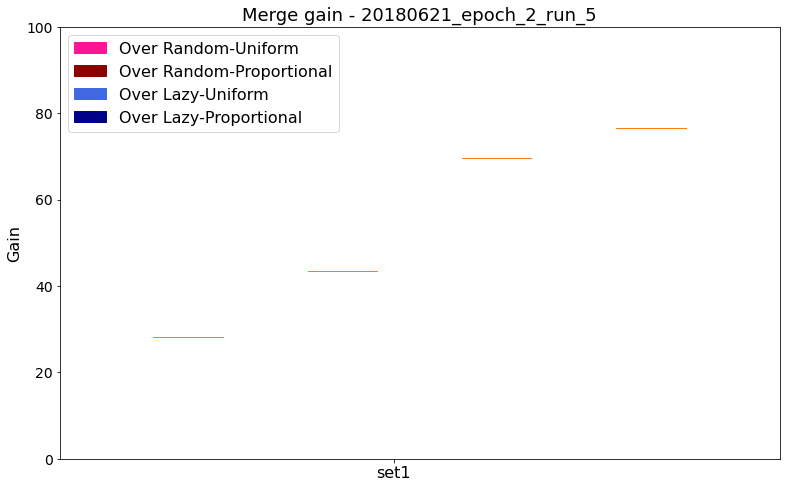

In [34]:
## pre-processing data
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = get_mean_from_iterations(ret_sol1_ll, ret_sol2_ll, ret_sol3_ll, ret_sol4_ll, ret_us_ll, all_metrics)
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = normalize_error_result(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics)
## Get & record ensemble error
global_ensemble_error = get_ensemble_error(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics, global_ensemble_error)
## call plotting
call_plotting(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, name, mem_size, all_metrics, isSaveFig)

----

### 20180621_epoch_3_run_5

In [35]:
name = '20180621_epoch_3_run_5'


ret_sol1_ll = []
ret_sol2_ll = []
ret_sol3_ll = []
ret_sol4_ll = []
ret_us_ll = []

In [36]:

# ========== 20180621_epoch_3_run_5.json ==========

#############################
ret_us = {} 

measure_list = ['hh', 'change_det', ]
algos = ['cm']
widths = [4096]
rows = [3]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [2048]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

ret_us_ll.append(ret_us)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [65536]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [32768]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [262144]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [16384]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [131072]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)


Num of run: 5
max_list: {'hh': 222.52494468414938, 'change_det': 20.668113401140634, 'entropy': 287.98070624481835, 'card': 9.700889746958126, 'fsd': 1.7594520891568384}


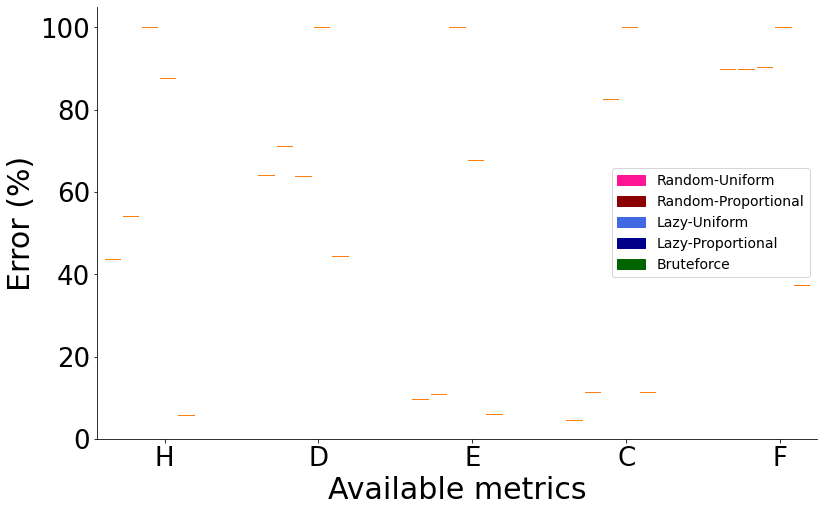

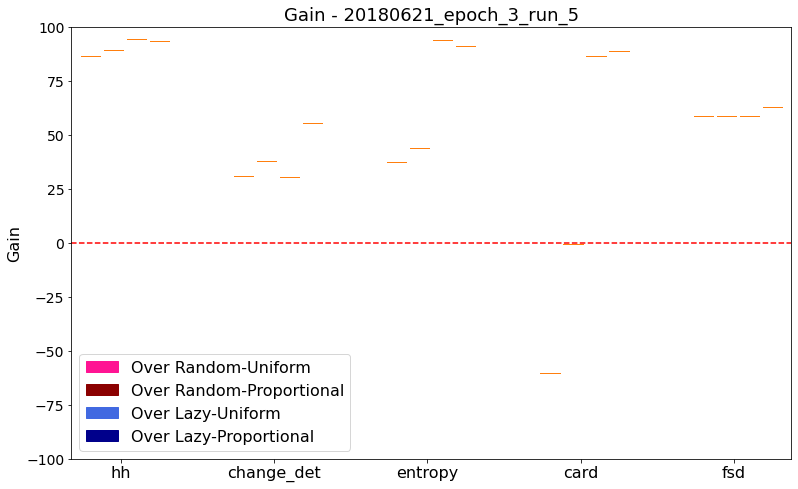

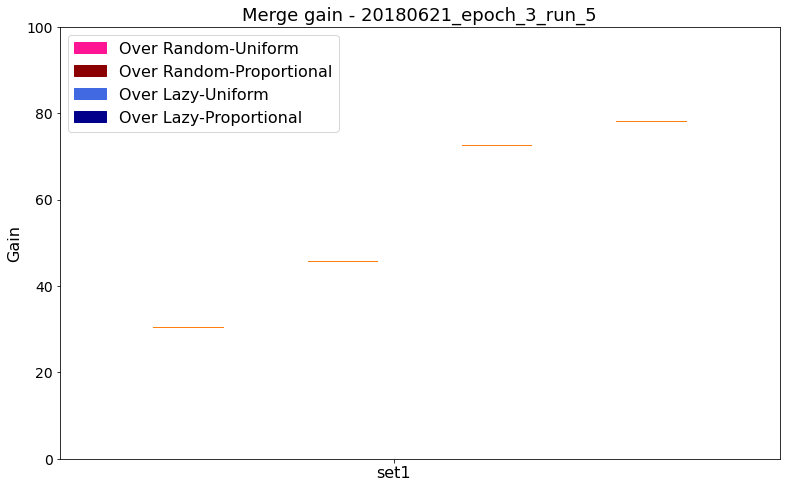

In [37]:
## pre-processing data
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = get_mean_from_iterations(ret_sol1_ll, ret_sol2_ll, ret_sol3_ll, ret_sol4_ll, ret_us_ll, all_metrics)
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = normalize_error_result(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics)
## Get & record ensemble error
global_ensemble_error = get_ensemble_error(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics, global_ensemble_error)
## call plotting
call_plotting(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, name, mem_size, all_metrics, isSaveFig)

----

### 20180621_epoch_4_run_5

In [38]:
name = '20180621_epoch_4_run_5'


ret_sol1_ll = []
ret_sol2_ll = []
ret_sol3_ll = []
ret_sol4_ll = []
ret_us_ll = []

In [39]:

# ========== 20180621_epoch_4_run_5.json ==========

#############################
ret_us = {} 

measure_list = ['hh', 'change_det', ]
algos = ['cs']
widths = [4096]
rows = [3]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [2048]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

ret_us_ll.append(ret_us)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [65536]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [32768]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [262144]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [16384]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [131072]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', 'change_det', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', 'change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)


Num of run: 5
max_list: {'hh': 217.07799135181807, 'change_det': 20.154163059510463, 'entropy': 269.3654981809983, 'card': 9.700889746958126, 'fsd': 1.7215484424309526}


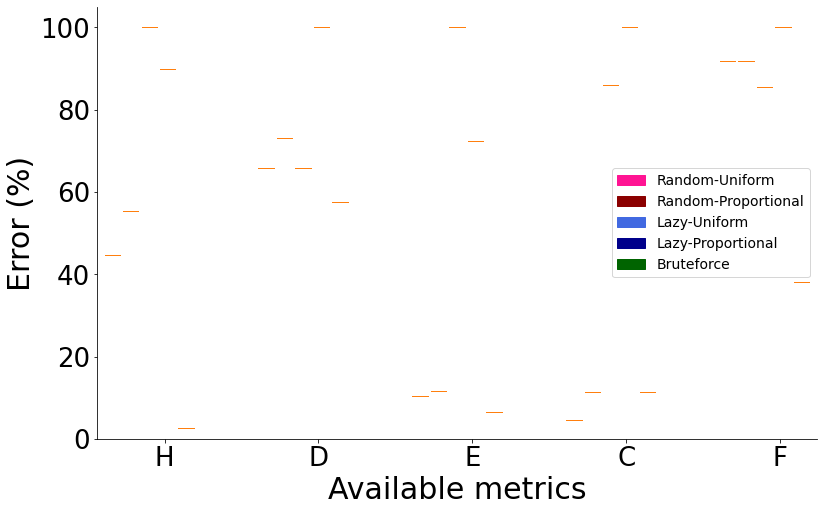

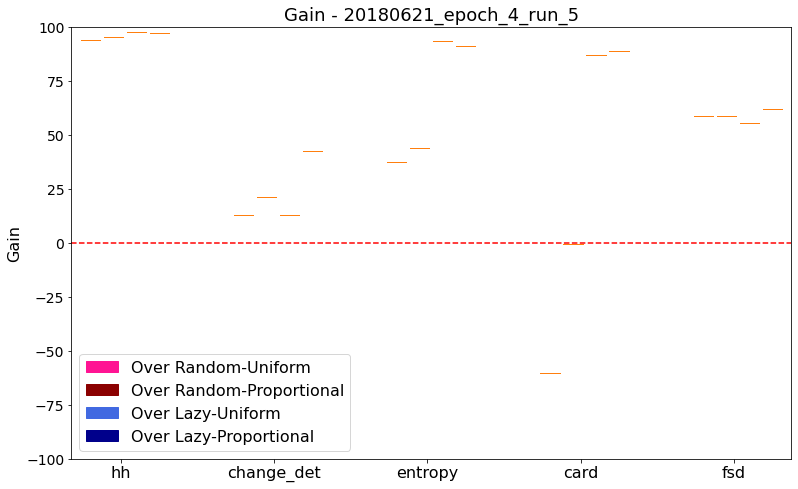

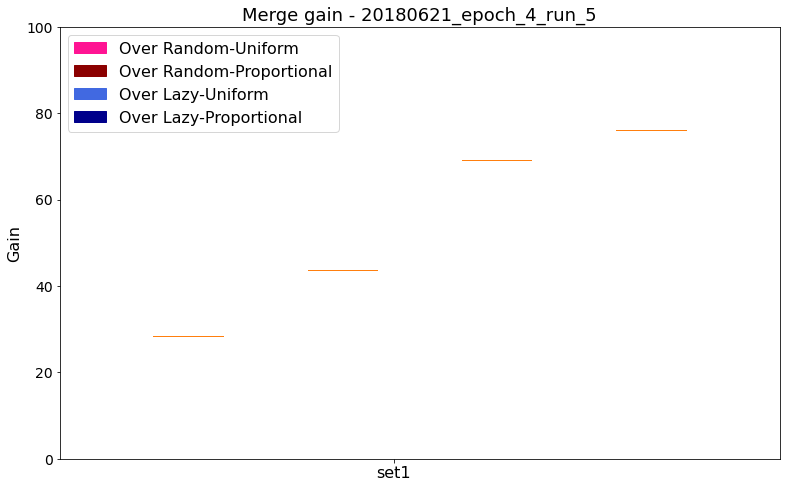

In [40]:
## pre-processing data
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = get_mean_from_iterations(ret_sol1_ll, ret_sol2_ll, ret_sol3_ll, ret_sol4_ll, ret_us_ll, all_metrics)
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = normalize_error_result(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics)
## Get & record ensemble error
global_ensemble_error = get_ensemble_error(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics, global_ensemble_error)
## call plotting
call_plotting(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, name, mem_size, all_metrics, isSaveFig)

----

### 20180621_epoch_5_run_5

In [41]:
name = '20180621_epoch_5_run_5'


ret_sol1_ll = []
ret_sol2_ll = []
ret_sol3_ll = []
ret_sol4_ll = []
ret_us_ll = []

In [42]:

# ========== 20180621_epoch_5_run_5.json ==========

#############################
ret_us = {} 

measure_list = ['hh', 'change_det', ]
algos = ['cm']
widths = [4096]
rows = [3]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [2048]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [131072]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

ret_us_ll.append(ret_us)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [65536]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [32768]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [262144]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [16384]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [131072]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)


Num of run: 5
max_list: {'hh': 211.63103801948677, 'change_det': 16.67485958375223, 'entropy': 250.75029011717834, 'card': 9.700889746958126, 'fsd': 1.6732997778459886}


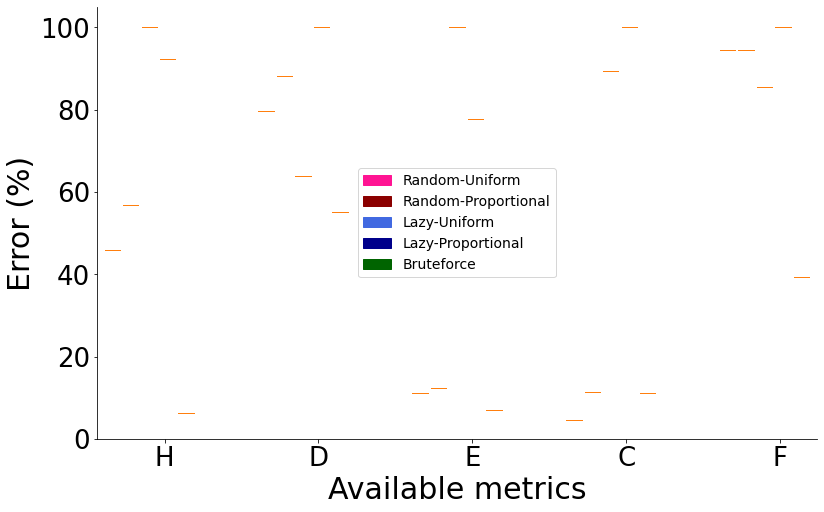

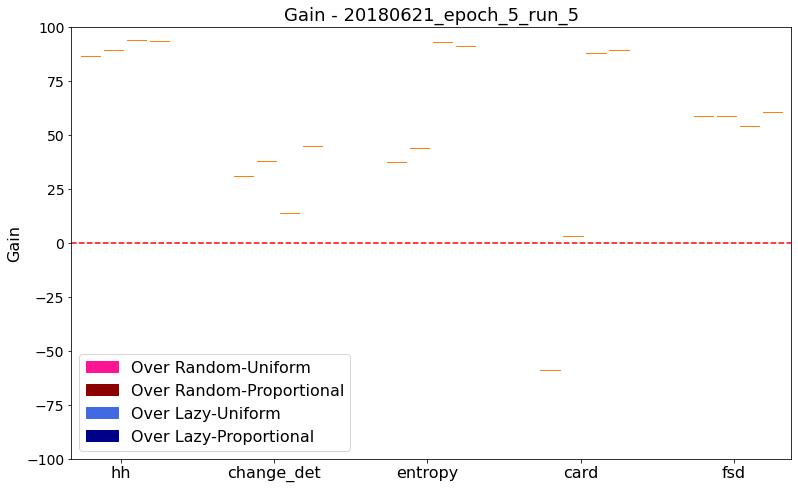

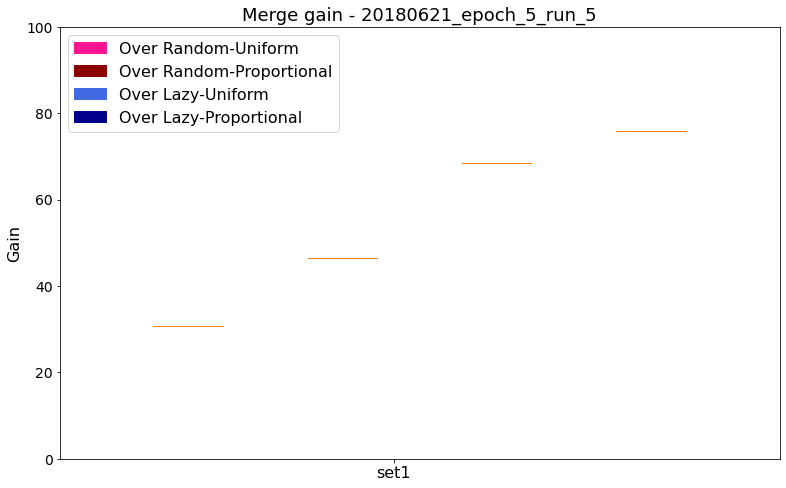

In [43]:
## pre-processing data
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = get_mean_from_iterations(ret_sol1_ll, ret_sol2_ll, ret_sol3_ll, ret_sol4_ll, ret_us_ll, all_metrics)
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = normalize_error_result(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics)
## Get & record ensemble error
global_ensemble_error = get_ensemble_error(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics, global_ensemble_error)
## call plotting
call_plotting(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, name, mem_size, all_metrics, isSaveFig)

## 20180816

In [44]:
datasets = ['equinix-nyc.dirA.20180816-131100.UTC.anon.pcap/']

----

### 20180816_epoch_0_run_5

In [45]:
name = '20180816_epoch_0_run_5'


ret_sol1_ll = []
ret_sol2_ll = []
ret_sol3_ll = []
ret_sol4_ll = []
ret_us_ll = []

In [46]:

# ========== 20180816_epoch_0_run_5.json ==========

#############################
ret_us = {} 

measure_list = ['hh', 'change_det', ]
algos = ['cs']
widths = [4096]
rows = [3]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [2048]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

ret_us_ll.append(ret_us)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [65536]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [32768]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [262144]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [16384]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [131072]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)


Num of run: 5
max_list: {'hh': 94.12079544803038, 'change_det': 17.134007480918022, 'entropy': 232.85022422464175, 'card': 8.947499274201594, 'fsd': 1.7425967530951243}


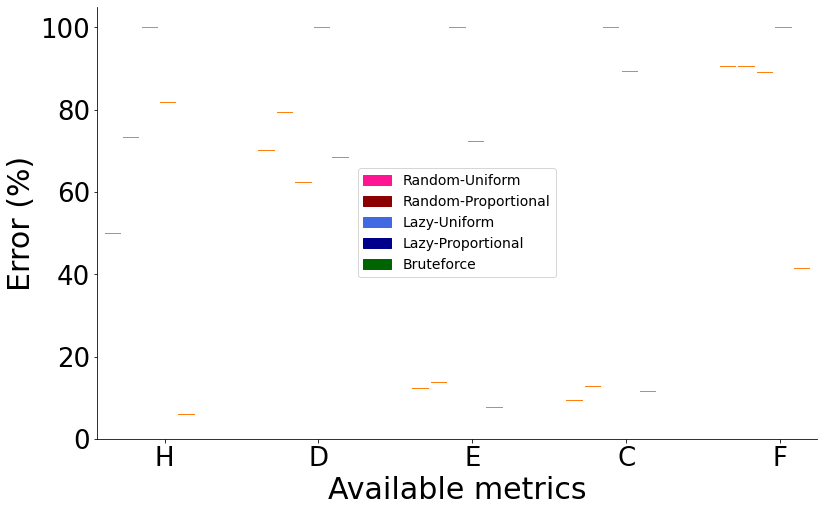

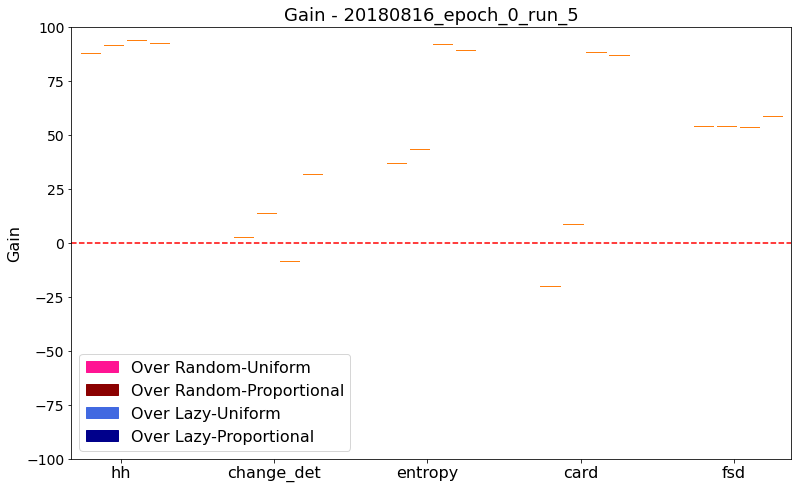

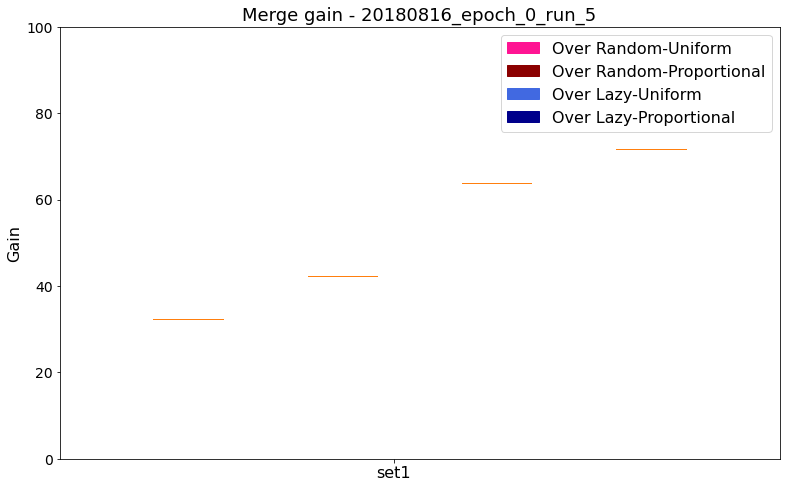

In [47]:
## pre-processing data
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = get_mean_from_iterations(ret_sol1_ll, ret_sol2_ll, ret_sol3_ll, ret_sol4_ll, ret_us_ll, all_metrics)
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = normalize_error_result(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics)
## Get & record ensemble error
global_ensemble_error = get_ensemble_error(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics, global_ensemble_error)
## call plotting
call_plotting(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, name, mem_size, all_metrics, isSaveFig)

----

### 20180816_epoch_1_run_5

In [48]:
name = '20180816_epoch_1_run_5'


ret_sol1_ll = []
ret_sol2_ll = []
ret_sol3_ll = []
ret_sol4_ll = []
ret_us_ll = []

In [49]:

# ========== 20180816_epoch_1_run_5.json ==========

#############################
ret_us = {} 

measure_list = ['hh', 'change_det', ]
algos = ['cm']
widths = [4096]
rows = [3]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [2048]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

ret_us_ll.append(ret_us)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [65536]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [32768]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [262144]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [16384]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [131072]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)


Num of run: 5
max_list: {'hh': 94.12079544803038, 'change_det': 19.497150533648426, 'entropy': 232.85022422464175, 'card': 8.947499274201594, 'fsd': 1.6973213145363277}


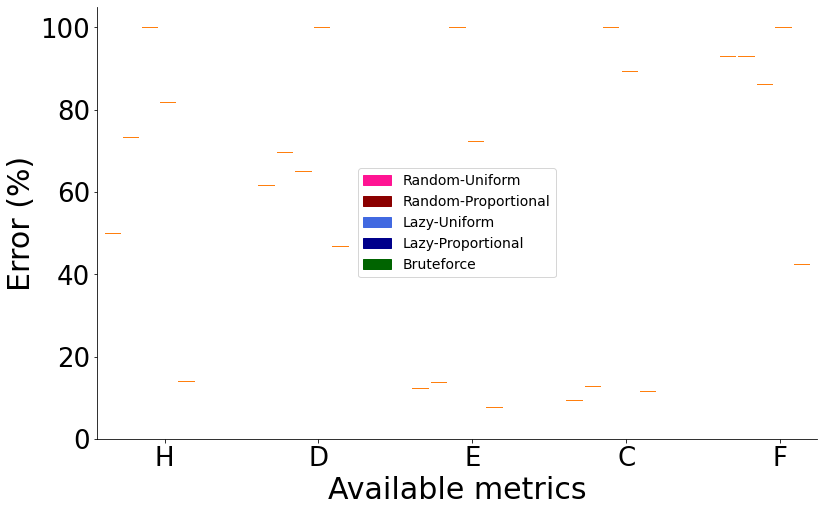

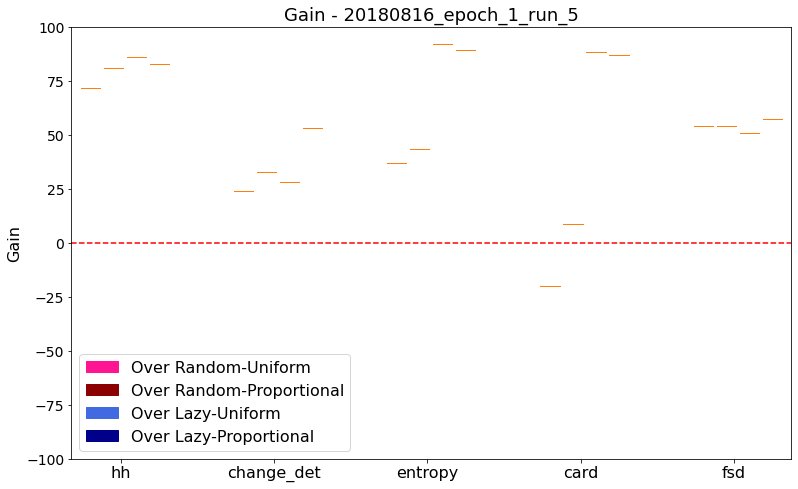

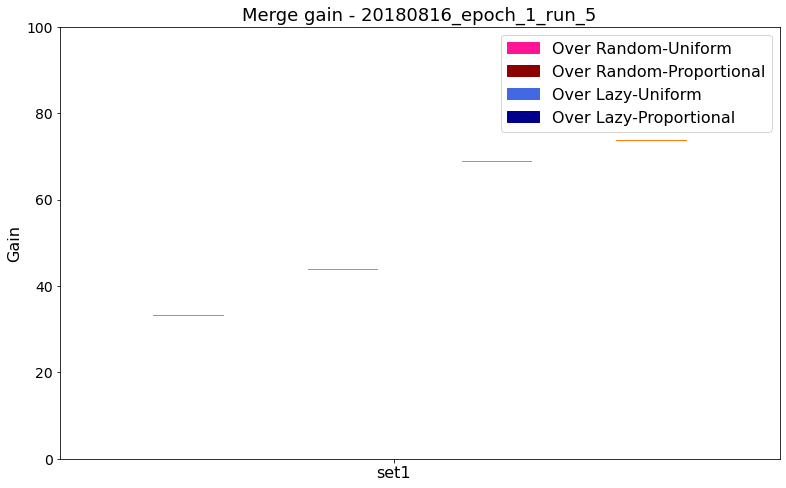

In [50]:
## pre-processing data
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = get_mean_from_iterations(ret_sol1_ll, ret_sol2_ll, ret_sol3_ll, ret_sol4_ll, ret_us_ll, all_metrics)
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = normalize_error_result(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics)
## Get & record ensemble error
global_ensemble_error = get_ensemble_error(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics, global_ensemble_error)
## call plotting
call_plotting(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, name, mem_size, all_metrics, isSaveFig)

----

### 20180816_epoch_2_run_5

In [51]:
name = '20180816_epoch_2_run_5'


ret_sol1_ll = []
ret_sol2_ll = []
ret_sol3_ll = []
ret_sol4_ll = []
ret_us_ll = []

In [52]:

# ========== 20180816_epoch_2_run_5.json ==========

#############################
ret_us = {} 

measure_list = ['hh', 'change_det', ]
algos = ['cs']
widths = [8192]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [2048]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

ret_us_ll.append(ret_us)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [65536]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [32768]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [262144]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [16384]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [131072]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)


Num of run: 5
max_list: {'hh': 94.12079544803038, 'change_det': 17.134007480918022, 'entropy': 232.85022422464175, 'card': 8.947499274201594, 'fsd': 1.7286045123568883}


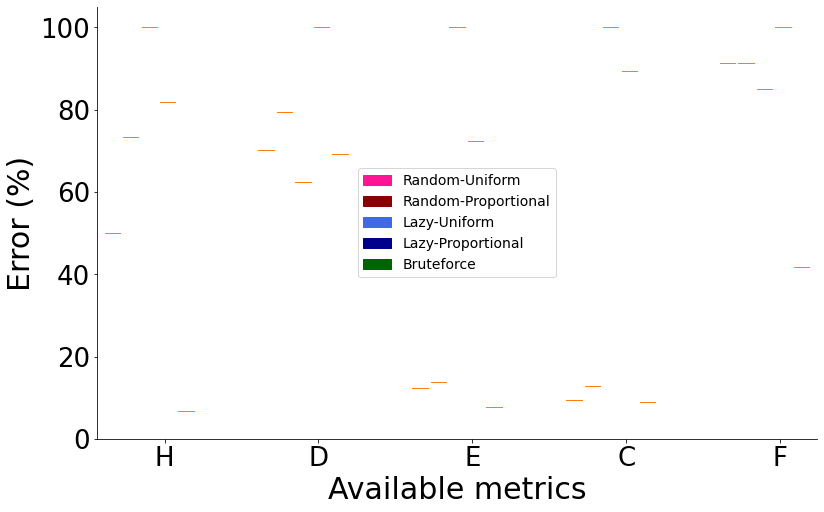

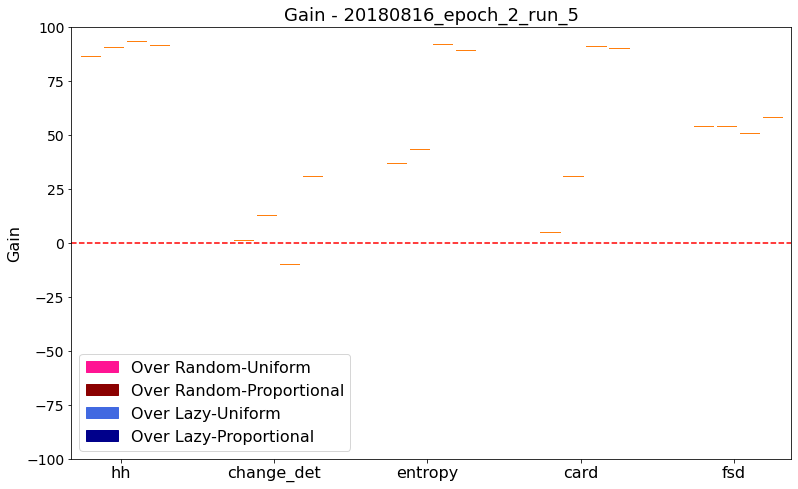

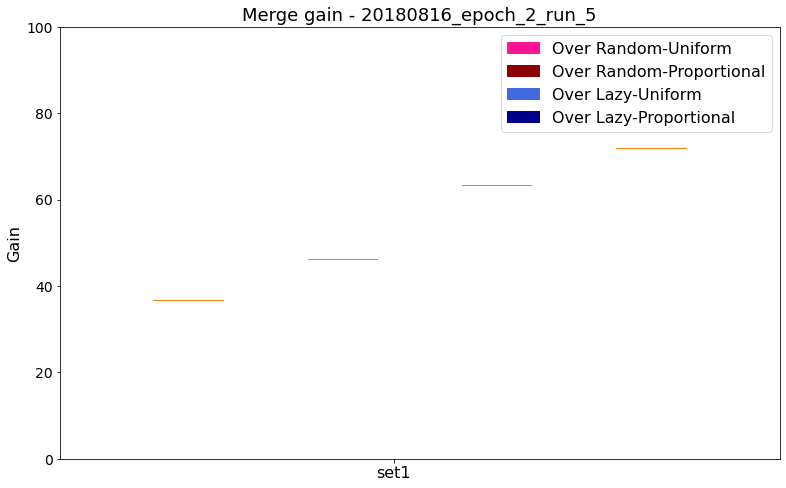

In [53]:
## pre-processing data
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = get_mean_from_iterations(ret_sol1_ll, ret_sol2_ll, ret_sol3_ll, ret_sol4_ll, ret_us_ll, all_metrics)
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = normalize_error_result(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics)
## Get & record ensemble error
global_ensemble_error = get_ensemble_error(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics, global_ensemble_error)
## call plotting
call_plotting(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, name, mem_size, all_metrics, isSaveFig)

----

### 20180816_epoch_3_run_5

In [54]:
name = '20180816_epoch_3_run_5'


ret_sol1_ll = []
ret_sol2_ll = []
ret_sol3_ll = []
ret_sol4_ll = []
ret_us_ll = []

In [55]:

# ========== 20180816_epoch_3_run_5.json ==========

#############################
ret_us = {} 

measure_list = ['hh', 'change_det', ]
algos = ['cm']
widths = [4096]
rows = [3]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [2048]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

ret_us_ll.append(ret_us)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [65536]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [32768]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [262144]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [16384]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [131072]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)


Num of run: 5
max_list: {'hh': 89.87957416454597, 'change_det': 17.93215054484106, 'entropy': 216.8386283553346, 'card': 8.708733456560264, 'fsd': 1.676682145102425}


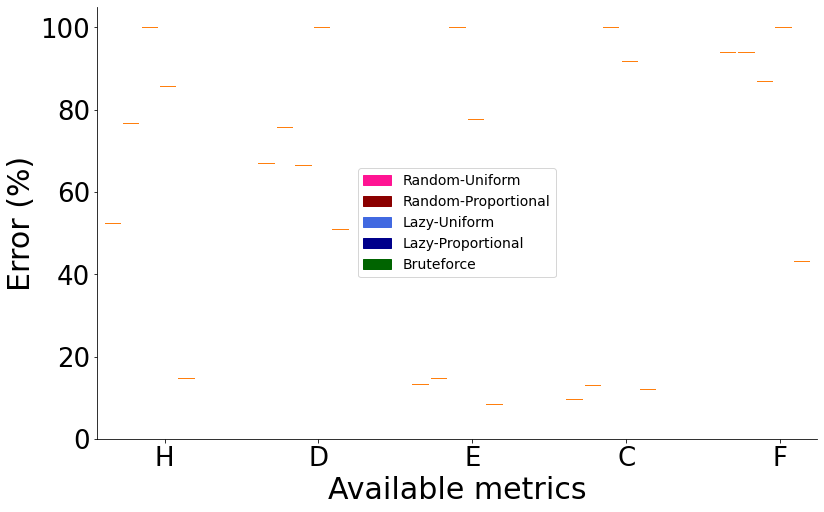

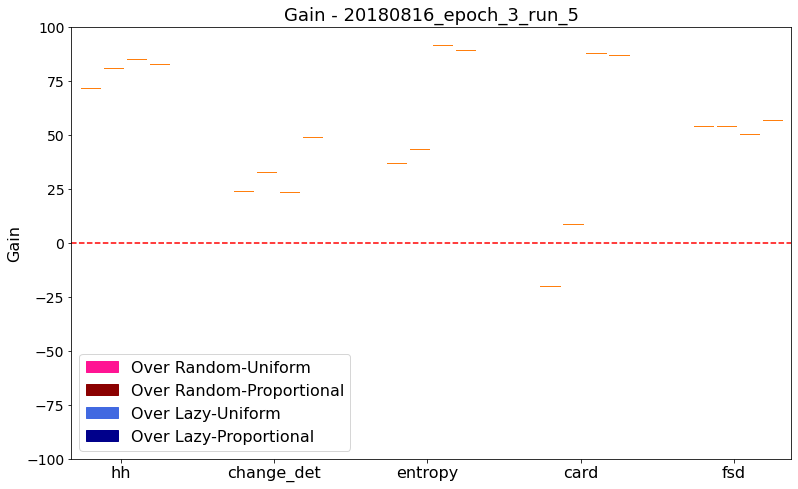

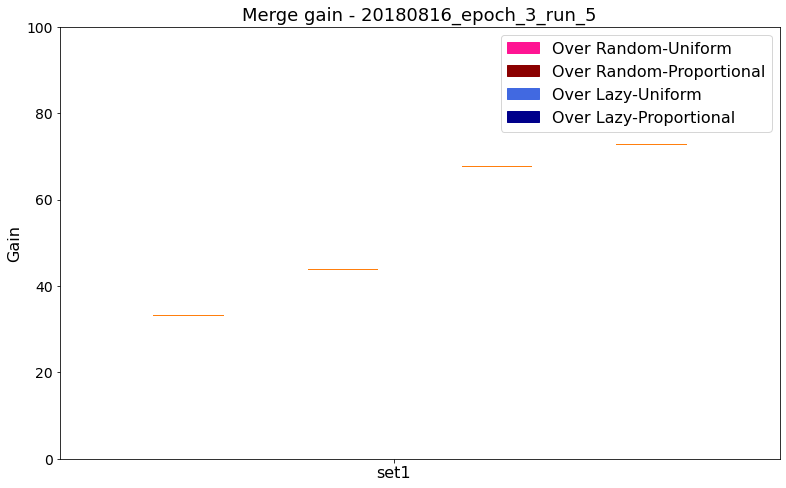

In [56]:
## pre-processing data
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = get_mean_from_iterations(ret_sol1_ll, ret_sol2_ll, ret_sol3_ll, ret_sol4_ll, ret_us_ll, all_metrics)
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = normalize_error_result(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics)
## Get & record ensemble error
global_ensemble_error = get_ensemble_error(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics, global_ensemble_error)
## call plotting
call_plotting(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, name, mem_size, all_metrics, isSaveFig)

----

### 20180816_epoch_4_run_5

In [57]:
name = '20180816_epoch_4_run_5'


ret_sol1_ll = []
ret_sol2_ll = []
ret_sol3_ll = []
ret_sol4_ll = []
ret_us_ll = []

In [58]:

# ========== 20180816_epoch_4_run_5.json ==========

#############################
ret_us = {} 

measure_list = ['hh', 'change_det', ]
algos = ['cs']
widths = [4096]
rows = [3]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [2048]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

ret_us_ll.append(ret_us)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [65536]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [32768]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [262144]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [16384]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [131072]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)


Num of run: 5
max_list: {'hh': 94.12079544803038, 'change_det': 19.497150533648426, 'entropy': 232.85022422464175, 'card': 8.947499274201594, 'fsd': 1.6973213145363277}


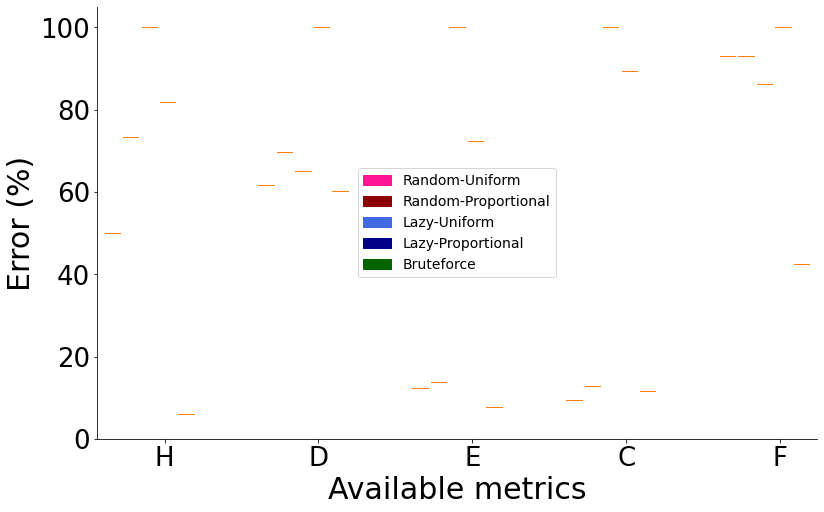

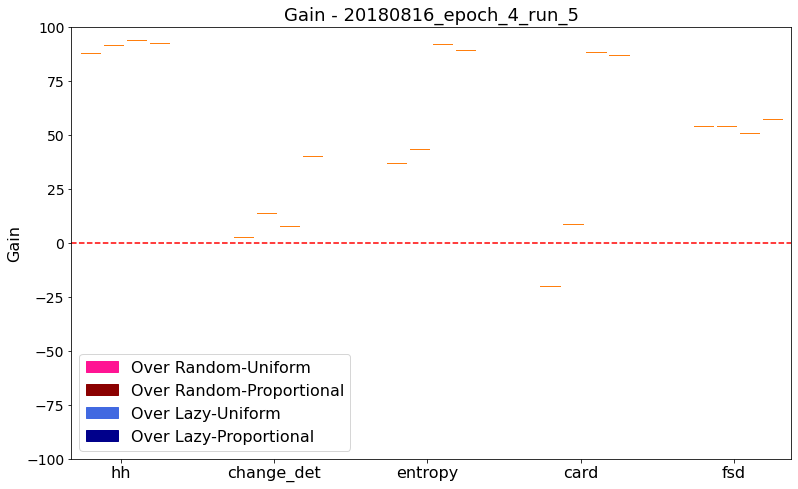

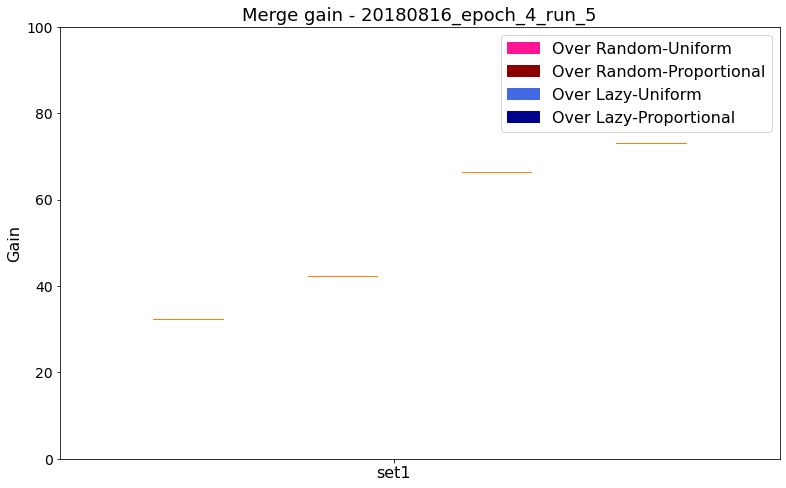

In [59]:
## pre-processing data
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = get_mean_from_iterations(ret_sol1_ll, ret_sol2_ll, ret_sol3_ll, ret_sol4_ll, ret_us_ll, all_metrics)
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = normalize_error_result(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics)
## Get & record ensemble error
global_ensemble_error = get_ensemble_error(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics, global_ensemble_error)
## call plotting
call_plotting(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, name, mem_size, all_metrics, isSaveFig)

----

### 20180816_epoch_5_run_5

In [60]:
name = '20180816_epoch_5_run_5'


ret_sol1_ll = []
ret_sol2_ll = []
ret_sol3_ll = []
ret_sol4_ll = []
ret_us_ll = []

In [61]:

# ========== 20180816_epoch_5_run_5.json ==========

#############################
ret_us = {} 

measure_list = ['hh', 'change_det', ]
algos = ['cm']
widths = [4096]
rows = [3]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [2048]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

ret_us_ll.append(ret_us)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [65536]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [32768]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [262144]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [16384]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [131072]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)


Num of run: 5
max_list: {'hh': 94.12079544803038, 'change_det': 17.134007480918022, 'entropy': 232.85022422464175, 'card': 8.947499274201594, 'fsd': 1.7286045123568883}


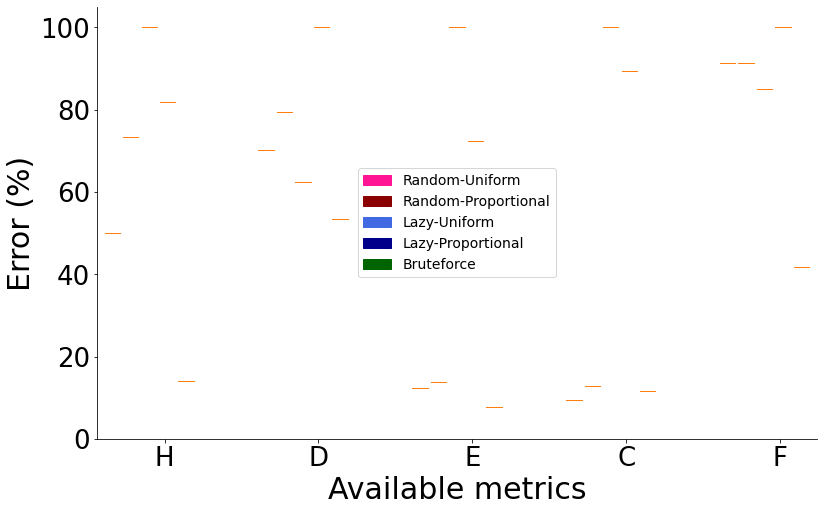

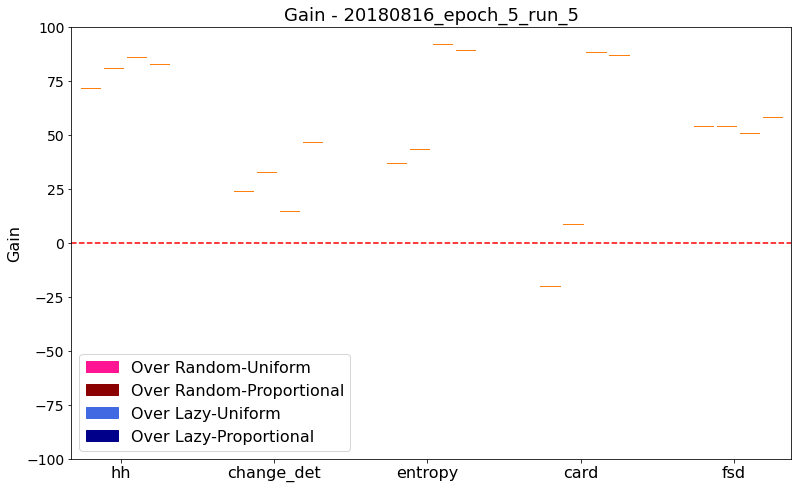

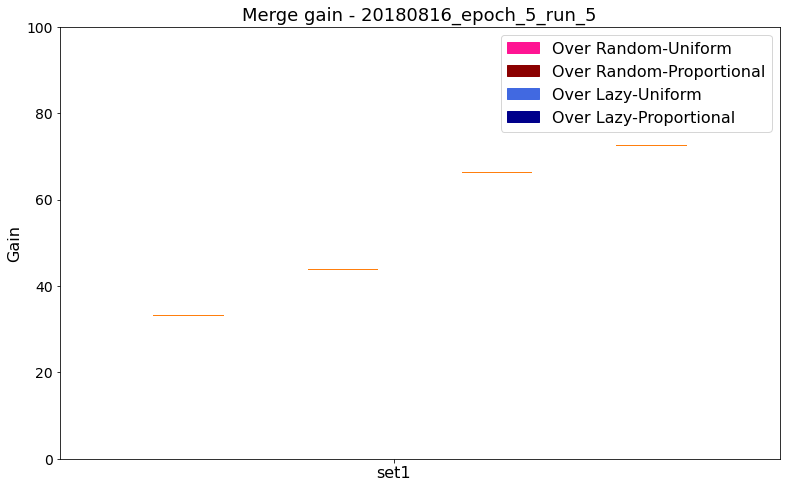

In [62]:
## pre-processing data
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = get_mean_from_iterations(ret_sol1_ll, ret_sol2_ll, ret_sol3_ll, ret_sol4_ll, ret_us_ll, all_metrics)
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = normalize_error_result(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics)
## Get & record ensemble error
global_ensemble_error = get_ensemble_error(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics, global_ensemble_error)
## call plotting
call_plotting(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, name, mem_size, all_metrics, isSaveFig)

---

## Plot Profiling interval

In [142]:
## Plot raw result
def boxplot_impact_memory(data, labels, name, isSaveFig = False):
    ## comparison version plot
    # box plot 
    # https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/
    # Box plots with custom fill colors
    # https://matplotlib.org/stable/gallery/statistics/boxplot_color.html

    import matplotlib.patches as mpatches

    xlabels = labels
    colors = ['deeppink', 'darkred', 'royalblue', 'darkblue']
    colors = colors * int(len(data) / 4) # 4 strawmen

    fig = plt.figure(figsize = (10, 6))
    # Creating axes instance
    ax = fig.add_axes([0, 0, 1, 1])
    
    ax.set_ylim([0, 100])

    # Creating plot
    bplot = ax.boxplot(x=data, 
                       positions = get_x_position(int(len(data) / 4), 4),
                       patch_artist=True) # , showfliers=False
    # ax.set_xlim(0, 1)

    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

    # plt.axhline(y = 0, color = 'r', linestyle = '--')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.grid()
    
    plt.ylabel("Error reduction (%)", fontsize=28)
    plt.xlabel("Profiling interval (trace used for profiling)", fontsize=28)
    plt.xticks(get_xtick_position(int(len(data) / 4), 4), xlabels, fontsize=26)
    plt.yticks(fontsize=26)

    # plt.title(f"Impact of memory - {name}", fontsize=18)

    # create legends
    legend_labels = ['over Random-Uniform', 'over Random-Proportional', 
                    'over Lazy-Uniform', 'over Lazy-Proportional']
    legend_patch = []
    legend_patch.append(mpatches.Patch(color=colors[0], label=legend_labels[0]))
    legend_patch.append(mpatches.Patch(color=colors[1], label=legend_labels[1]))
    legend_patch.append(mpatches.Patch(color=colors[2], label=legend_labels[2]))
    legend_patch.append(mpatches.Patch(color=colors[3], label=legend_labels[3]))
    plt.legend(handles=legend_patch, fontsize=22, frameon=False, ncol=2, loc=(0,0.8)) # , loc="upper right"

    # import pickle
    # with open(f'pickles/{name}.pkl', 'wb') as fout:
    #     pickle.dump(fig, fout)
    # plt.savefig('figures/profiling_interval.pdf', format='pdf', bbox_inches='tight')

    # show plot
    plt.show()

In [138]:
import copy
# name_for_all_taskset = []
# for d in global_name_all_mem:
#     tmp = d.split('(')[0].split('m ')[1]
#     tmp = tmp.split(' ')[0]
#     name_for_all_taskset.append(tmp)
# name_all_ensemble = copy.deepcopy(global_name_all_ensemble)


# name_all_ensemble = list(map(str, range(5, -1, -1)))
name_all_ensemble = []
for i,j in zip(range(5, -1, -1), range(6, 0, -1)):
    print(i, j)
    tmp = f'{i} ($\mathregular{{P_{j}}}$)'
    name_all_ensemble.append(tmp)

name_all_ensemble

5 6
4 5
3 4
2 3
1 2
0 1


['5 ($\\mathregular{P_6}$)',
 '4 ($\\mathregular{P_5}$)',
 '3 ($\\mathregular{P_4}$)',
 '2 ($\\mathregular{P_3}$)',
 '1 ($\\mathregular{P_2}$)',
 '0 ($\\mathregular{P_1}$)']

In [139]:
# combine the result on the same epoch but from different dates
strawmen_num = 4
epoch_num = 6
# how many boxes in a date
date_size = epoch_num * strawmen_num
# how many date
date_num = int(len(global_merge_gain_all_ensemble) / date_size)
date_num

3

In [140]:
merge_gain_all_ensemble = []

for i in range(date_size):
    merge_gain_all_ensemble.append([])
    for date in range(date_num):
        idx = i + date_size*date
        # print(i, date, idx)
        # print(global_merge_gain_all_ensemble[idx][0])
        merge_gain_all_ensemble[i].append(global_merge_gain_all_ensemble[idx][0])

ensemble_error = []
size = epoch_num * (strawmen_num + 1)
for i in range(size):
    ensemble_error.append([])
    for date in range(date_num):
        idx = i + size*date
        # print(i, date, idx)
        # print(ensemble_error[idx][0])
        ensemble_error[i].append(global_ensemble_error[idx][0])

len(merge_gain_all_ensemble)
# len(ensemble_error)

24

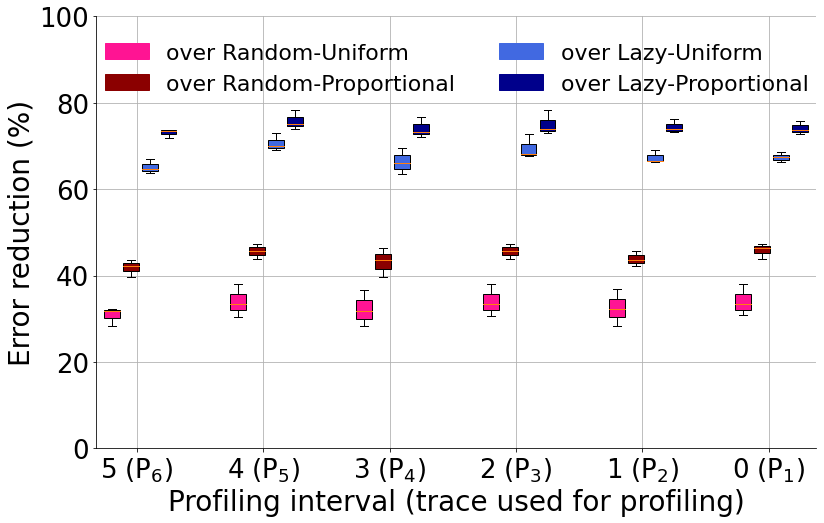

In [141]:
isSaveFig = False
boxplot_impact_memory(merge_gain_all_ensemble, name_all_ensemble, "profiling_interval", isSaveFig)

### Save plot data as json

In [79]:
# Save data as json
isDumpJson = False

if isDumpJson:
    # save gain result
    ll = []
    for arr in merge_gain_all_ensemble:
        # ll.append(arr.tolist())
        ll.append(arr)
    with open('results/figure_data/profiling_interval_gain.json', 'w') as out:
        json.dump(ll, out)
        
    # save ensemble error
    ll = []
    for arr in ensemble_error:
        # ll.append(arr.tolist())
        ll.append(arr)
    with open('results/figure_data/profiling_interval_error.json', 'w') as out:
        json.dump(ll, out)